In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## 🔧Data Cleaning & Transformation – Hints

In [3]:
data = pd.read_excel(r"C:\Users\kolaw\Downloads\sales_data.xlsx", sheet_name="Sheet1")

--Load and inspect dataset – Use a library to load the CSV file and explore the structurewith basic summary functions.

In [5]:
data

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
0,2024-09-19,East,Bradley Phelps,Keyboard,32,104.665713,3819.84
1,2024-04-01,East,Michelle Barker,Laptop,76,173.919504,16472.24
2,2025-03-17,East,Vincent Whitehead,Monitor,30,206.927619,7728.60
3,2023-12-19,East,Michelle Barker,Monitor,92,262.868971,30216.48
4,2024-06-16,Central,Brittany Rogers,Monitor,58,268.853194,17326.92
...,...,...,...,...,...,...,...
4995,2023-12-23,East,Christopher Villarreal,Headset,94,106.591011,11360.84
4996,2024-11-17,North,Rebekah Moreno,Mouse,92,307.201490,31707.80
4997,2024-07-24,East,Jessica Rivers,Desk,75,213.534408,19282.50
4998,2024-02-02,Central,Michelle Barker,Keyboard,89,354.280762,35052.65


--Convert OrderDate to datetime – Ensure the date column is in the correct format to extract time-based insights like month/year.

In [7]:
# Convert OrderDate to datetime format
data['OrderDate'] = pd.to_datetime(data['OrderDate'], errors='coerce')

# Extract Month and Year
data['Month'] = data['OrderDate'].dt.month
data['Year'] = data['OrderDate'].dt.year

--Handle missing/duplicate values – Check for and deal with missing entries or duplicaterows appropriately.

In [9]:
# Check for missing values
missing_values = data.isnull().sum()

# Count duplicate rows
duplicate_count = data.duplicated().sum()

# Drop duplicates if any
data_cleaned = data.drop_duplicates()

# Optionally: Drop rows with missing values (depending on context, we could also impute)
data_cleaned = data_cleaned.dropna()

# Re-check after cleaning

In [10]:
data_cleaned

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total,Month,Year
0,2024-09-19,East,Bradley Phelps,Keyboard,32,104.665713,3819.84,9,2024
1,2024-04-01,East,Michelle Barker,Laptop,76,173.919504,16472.24,4,2024
2,2025-03-17,East,Vincent Whitehead,Monitor,30,206.927619,7728.60,3,2025
3,2023-12-19,East,Michelle Barker,Monitor,92,262.868971,30216.48,12,2023
4,2024-06-16,Central,Brittany Rogers,Monitor,58,268.853194,17326.92,6,2024
...,...,...,...,...,...,...,...,...,...
4995,2023-12-23,East,Christopher Villarreal,Headset,94,106.591011,11360.84,12,2023
4996,2024-11-17,North,Rebekah Moreno,Mouse,92,307.201490,31707.80,11,2024
4997,2024-07-24,East,Jessica Rivers,Desk,75,213.534408,19282.50,7,2024
4998,2024-02-02,Central,Michelle Barker,Keyboard,89,354.280762,35052.65,2,2024


### Create Month, Year, and Profit columns – Extract components from the date and calculate new derived columns using basic arithmetic.

In [11]:
# Profit = Units × Unit Cost

data['Cost'] = data['Units'] * data['Unit Cost']
data['Profit'] = data['Total'] - data['Cost']

# Preview the new columns
data[['OrderDate','Region','Rep','Item','Month', 'Year', 'Units', 'Unit Cost','Cost','Total','Profit']].head()


,OrderDate,Region,Rep,Item,Month,Year,Units,Unit Cost,Cost,Total,Profit
0,2024-09-19,East,Bradley Phelps,Keyboard,9,2024,32,104.665713,3349.302808,3819.84,470.537192
1,2024-04-01,East,Michelle Barker,Laptop,4,2024,76,173.919504,13217.882270,16472.24,3254.357730
2,2025-03-17,East,Vincent Whitehead,Monitor,3,2025,30,206.927619,6207.828574,7728.60,1520.771426
3,2023-12-19,East,Michelle Barker,Monitor,12,2023,92,262.868971,24183.945330,30216.48,6032.534670
4,2024-06-16,Central,Brittany Rogers,Monitor,6,2024,58,268.853194,15593.485232,17326.92,1733.434768


### 📊Exploratory Data Analysis – Hints

In [12]:
# Calculate total revenue and total profit
total_revenue = data['Total'].sum()
total_profit = data['Profit'].sum()

# Return overall business performance summary
{
    "Total Revenue": round(total_revenue, 2),
    "Total Profit": round(total_profit, 2)
}

{'Total Revenue': 64757781.65, 'Total Profit': 9687542.03}

In [13]:
# Top 5 sales reps by revenue – Group by sales representative and rank them based ontotal revenue.
# Group by sales representative and sum their total revenue
top_reps = data.groupby('Rep')['Total'].sum().sort_values(ascending=False).head(5)

# Convert to DataFrame for clarity
top_reps_data = top_reps.reset_index().rename(columns={'Total': 'Total Revenue'})

top_reps_data


,Rep,Total Revenue
0,Stephen Richards,3544893.86
1,Michelle Marquez,3529541.19
2,Sandy Whitaker,3484394.05
3,Lindsey Fisher,3451248.73
4,Cheryl Robbins,3387493.35


In [114]:
# Top 10 products by revenue – Analyze product-level performance by summing revenues and sorting.
# Group by Item (product) and sum revenue
top10_products_revenue = data.groupby('Item')['Total'].sum().sort_values(ascending=False).head(10)

# Convert to DataFrame
top10_products_revenue = top_products.reset_index().rename(columns={'Total': 'Total Revenue'})

top10_products_revenue

,Item,Total Revenue
0,Headset,6972049.09
1,Tablet,6912215.82
2,Webcam,6750240.01
3,Laptop,6633076.78
4,Keyboard,6594728.56
5,Mouse,6494077.95
6,Desk,6374606.25
7,Monitor,6111348.65
8,Chair,6086940.06
9,Printer,5828498.48


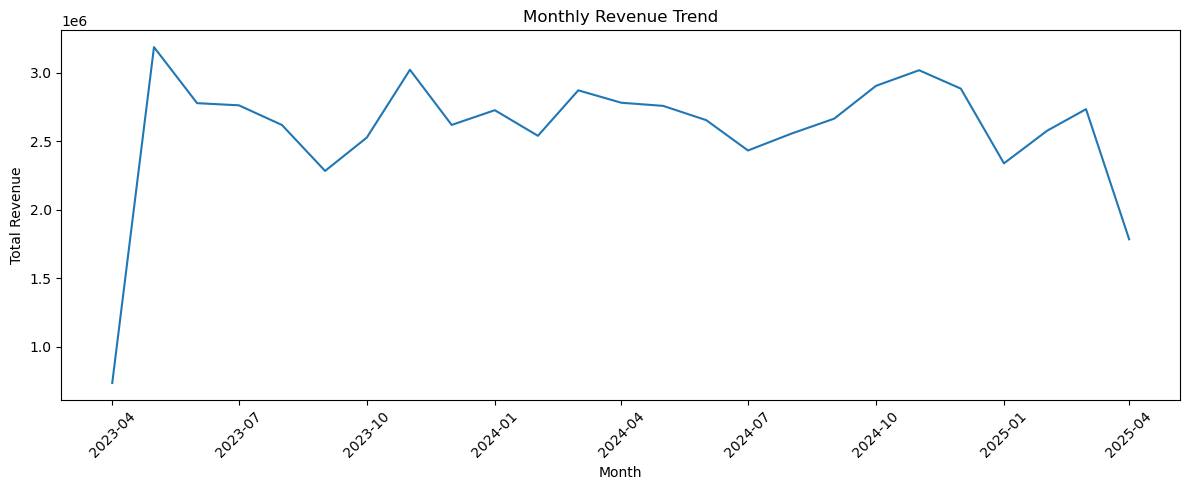

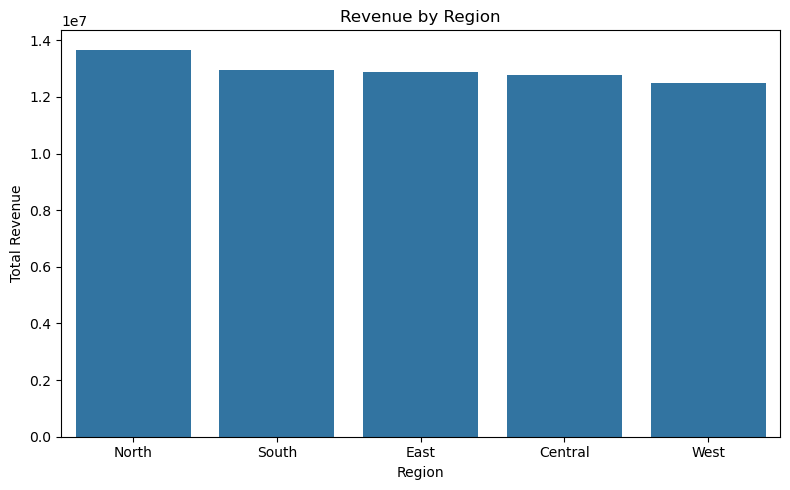

(   Year  Month       Total     Period
 0  2023      4   734081.46 2023-04-01
 1  2023      5  3187640.78 2023-05-01
 2  2023      6  2778195.89 2023-06-01
 3  2023      7  2762476.67 2023-07-01
 4  2023      8  2618741.35 2023-08-01,
     Region        Total
 0    North  13667437.42
 1    South  12952957.17
 2     East  12882106.63
 3  Central  12771314.41
 4     West  12483966.02)

In [15]:
# Revenue trend  (monthly)
monthly_revenue = data.groupby(['Year', 'Month'])['Total'].sum().reset_index()
monthly_revenue['Period'] = pd.to_datetime(monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str) + '-01')

# Revenue by region
region_revenue = data.groupby('Region')['Total'].sum().sort_values(ascending=False).reset_index()

# Plot revenue trend over time
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_revenue, x='Period', y='Total')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot revenue by region
plt.figure(figsize=(8, 5))
sns.barplot(data=region_revenue, x='Region', y='Total')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

monthly_revenue.head(), region_revenue


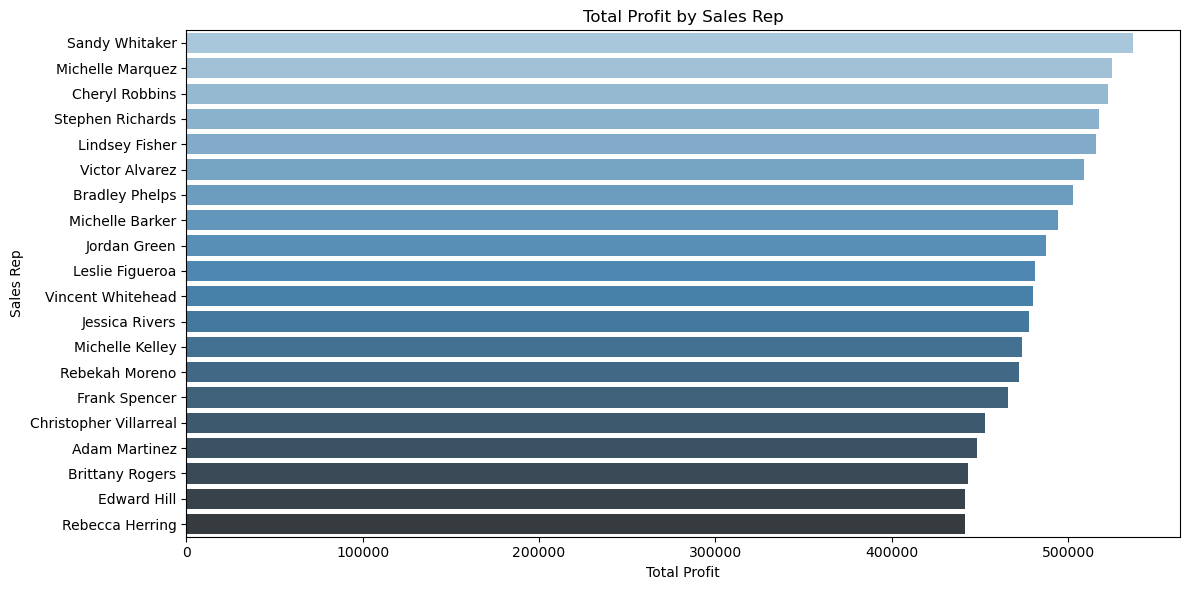

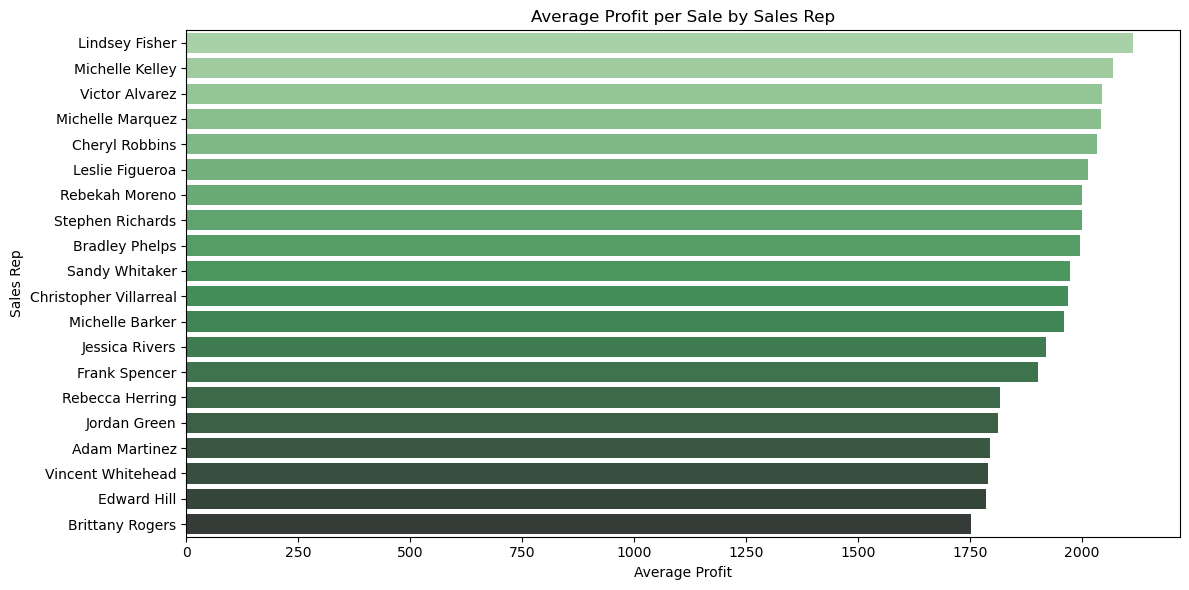

(                Rep         Profit
 0    Sandy Whitaker  536528.116876
 1  Michelle Marquez  524864.712375
 2    Cheryl Robbins  522508.798656
 3  Stephen Richards  517683.312752
 4    Lindsey Fisher  515555.817934,
                 Rep       Profit
 0    Lindsey Fisher  2112.933680
 1   Michelle Kelley  2068.814144
 2    Victor Alvarez  2044.714263
 3  Michelle Marquez  2042.275145
 4    Cheryl Robbins  2033.108166)

In [16]:
# Sales rep profit margin analysis – Compute average or total profit per rep and visualize their efficiency.
# Calculate total profit per sales rep
rep_profit = data.groupby('Rep')['Profit'].sum().sort_values(ascending=False).reset_index()

# Calculate average profit per rep
rep_avg_profit = data.groupby('Rep')['Profit'].mean().sort_values(ascending=False).reset_index()

# Plot total profit per rep
plt.figure(figsize=(12, 6))
sns.barplot(data=rep_profit, x='Profit', y='Rep', palette='Blues_d')
plt.title('Total Profit by Sales Rep')
plt.xlabel('Total Profit')
plt.ylabel('Sales Rep')
plt.tight_layout()
plt.show()

# Plot average profit per rep
plt.figure(figsize=(12, 6))
sns.barplot(data=rep_avg_profit, x='Profit', y='Rep', palette='Greens_d')
plt.title('Average Profit per Sale by Sales Rep')
plt.xlabel('Average Profit')
plt.ylabel('Sales Rep')
plt.tight_layout()
plt.show()

rep_profit.head(), rep_avg_profit.head()

## 📈Modeling – Hints

In [53]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

---Linear Regression: Predict Total – Use numeric input features (e.g., units and cost) tobuild a model that predicts revenue.

In [45]:
lm = smf.ols('Total ~ Units + Cost', data).fit()

In [47]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 9.173e+05
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        10:50:30   Log-Likelihood:                -38881.
No. Observations:                5000   AIC:                         7.777e+04
Df Residuals:                    4997   BIC:                         7.779e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.2505     16.529      0.983      0.326     -16.154      48.655
Units          1.0550      0.381      2.772      0.006       0.309       1.801
Cost           1.1696      0.001   1004.334      0.000       1.167       1.172
==============================================================================
Omnibus:                      377.072   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1658.871
Skew:                           0.236   Prob(JB):                         0.00
Kurtosis:                       5.782   Cond. No.                     2.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
lm.params

Intercept    16.250460
Units         1.054979
Cost          1.169567
dtype: float64

In [21]:
lm.conf_int()

,0,1
Intercept,-16.154079,48.654999
Units,0.308887,1.801071
Cost,1.167284,1.171850


In [22]:
lm.pvalues

Intercept    0.325589
Units        0.005591
Cost         0.000000
dtype: float64

In [23]:
lm.rsquared

0.9972836870370836

In [24]:
round( float( lm.rsquared ), 3 )

0.997

In [25]:
ltmpredic = lm.predict(data)

In [26]:
ltmpredic[0:10]

0     3967.242264
1    15555.621634
2     7308.368389
3    28398.041696
4    18315.057751
5     6762.632880
6     2312.434311
7    13912.246438
8     2328.993254
9     8145.975772
dtype: float64

---Evaluate R2 and RMSE – Apply evaluation metrics to understand model accuracy and error.

In [27]:
## Evaluate R2 and RMSE – Apply evaluation metrics to understand model accuracy and error.

In [49]:
y_pred = lm.fittedvalues

# Get actual target values
y_true = data['Total']

# Evaluate R² and MSE
r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

# Output results
print("R-squared:", r2)
print("Mean Squared Error:", mse)

R-squared: 0.9972836870370836
Mean Squared Error: 332518.011516286


In [51]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 576.6437474873771


In [85]:
## to check if my model is not overfitting
X_train ,y_test = train_test_split(data, test_size=0.2, random_state=42)

In [87]:
lm = smf.ols('Total ~ Units + Cost', data).fit()

In [89]:
X_pred = lm.predict(X_train)
train_r2 = r2_score(train_data['Total'], X_pred)
X_rmse = np.sqrt(mean_squared_error(X_train['Total'], X_pred))

# Evaluate on testing data
y_pred = lm.predict(y_test)
test_r2 = r2_score(y_test['Total'], y_pred)
y_rmse = np.sqrt(mean_squared_error(y_test['Total'], y_pred))


In [93]:
print("Training R²:", train_r2)
print("Training RMSE:", X_rmse)
print("Testing R²:", test_r2)
print("Testing RMSE:", y_rmse)

Training R²: 0.9972356856466468
Training RMSE: 583.1176497829481
Testing R²: 0.9974787826131796
Testing RMSE: 549.9866213171688


-- based on the above result our model is not overfittinf and can perform well on unseen data

# Segment reps by performance levels – Categorize sales reps based on quantiles orthresholds of revenue or profit.

In [74]:
# Calculate profit as Units * Unit Cost since Profit is not in the dataset yet
data['Profit'] = data['Total'] * data['Cost']

# Group sales reps by total profit
rep_performance = data.groupby('Rep')['Profit'].sum().reset_index()

# Categorize into performance tiers based on quantiles
rep_performance['Performance_Level'] = pd.qcut(rep_performance['Profit'], q=3, labels=['Low', 'Medium', 'High'])

# Sort and display performance levels
rep_performance_sorted = rep_performance.sort_values('Profit', ascending=False)

rep_performance_sorted

,Rep,Profit,Performance_Level
13,Michelle Marquez,7.022711e+10,High
10,Lindsey Fisher,6.958950e+10,High
17,Stephen Richards,6.954422e+10,High
16,Sandy Whitaker,6.812385e+10,High
3,Cheryl Robbins,6.634863e+10,High
9,Leslie Figueroa,6.444050e+10,High
11,Michelle Barker,6.392576e+10,High
18,Victor Alvarez,6.333033e+10,Medium
12,Michelle Kelley,6.321799e+10,Medium
7,Jessica Rivers,6.320898e+10,Medium


## 🧠Case Study Questions – Hints

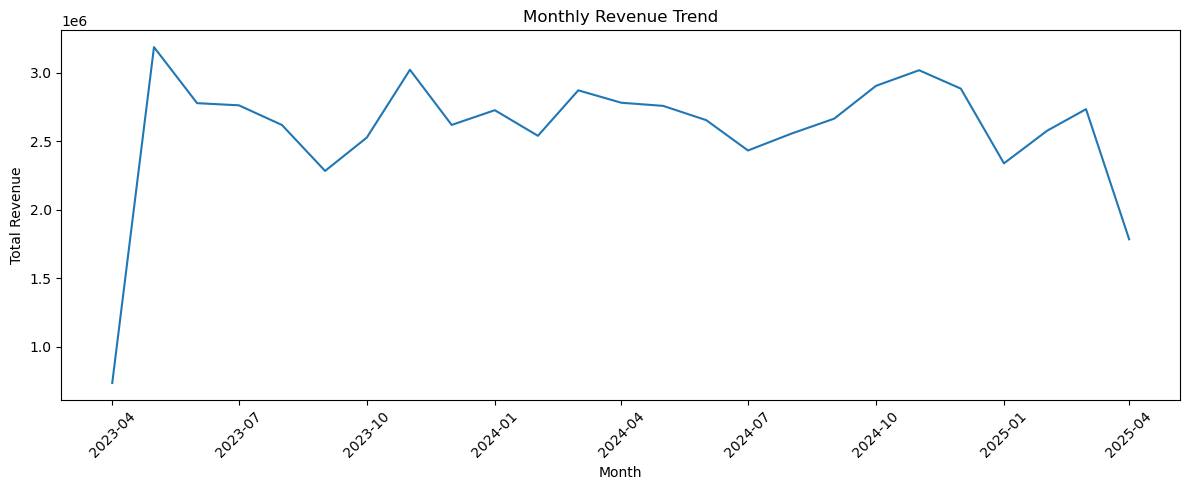

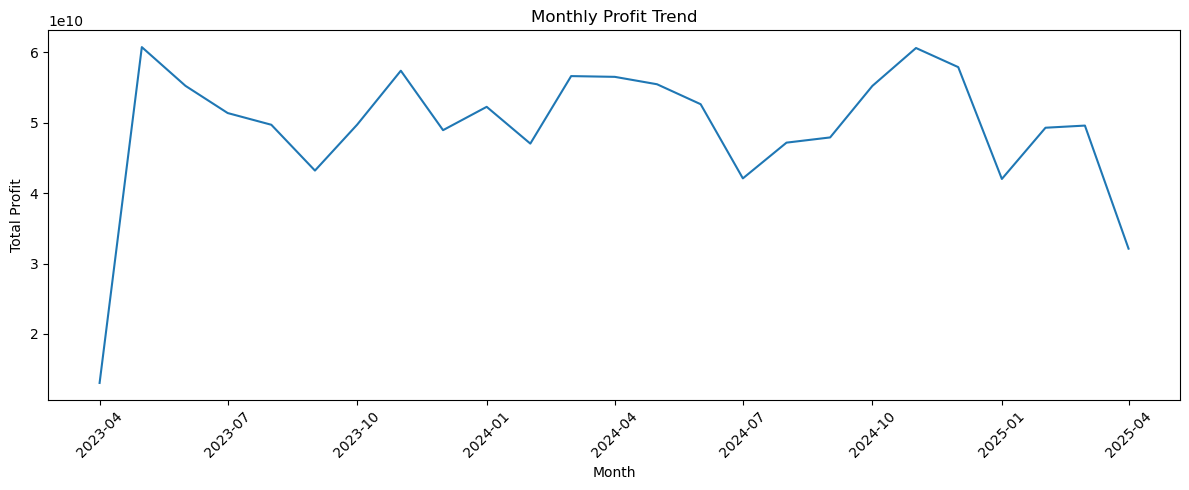

,Period,Total,Profit
0,2023-04-01,734081.46,1.304488e+10
1,2023-05-01,3187640.78,6.075659e+10
2,2023-06-01,2778195.89,5.525642e+10
3,2023-07-01,2762476.67,5.138953e+10
4,2023-08-01,2618741.35,4.972496e+10
5,2023-09-01,2283106.87,4.321695e+10
6,2023-10-01,2526932.64,4.974679e+10
7,2023-11-01,3022098.04,5.740514e+10
8,2023-12-01,2619197.28,4.895834e+10
9,2024-01-01,2726753.53,5.227378e+10


In [96]:
# Group by Year and Month to summarize revenue and profit over time
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data['Year'] = data['OrderDate'].dt.year
data['Month'] = data['OrderDate'].dt.month
data['Period'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-01')

# Summarize revenue and profit by month
monthly_summary = data.groupby('Period').agg({'Total': 'sum', 'Profit': 'sum'}).reset_index()

# Plot Revenue Trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_summary, x='Period', y='Total')
plt.title('Monthly Revenue Trend')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Profit Trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_summary, x='Period', y='Profit')
plt.title('Monthly Profit Trend')
plt.ylabel('Total Profit')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

monthly_summary


--- Interpretation:
Strongest revenue and profit months appear to be May and November–December, suggesting seasonal buying patterns.

April 2025 shows a concerning decline that may warrant investigation

# Which reps and regions perform best? – Check bar charts and ranking tables based ontotal revenue.

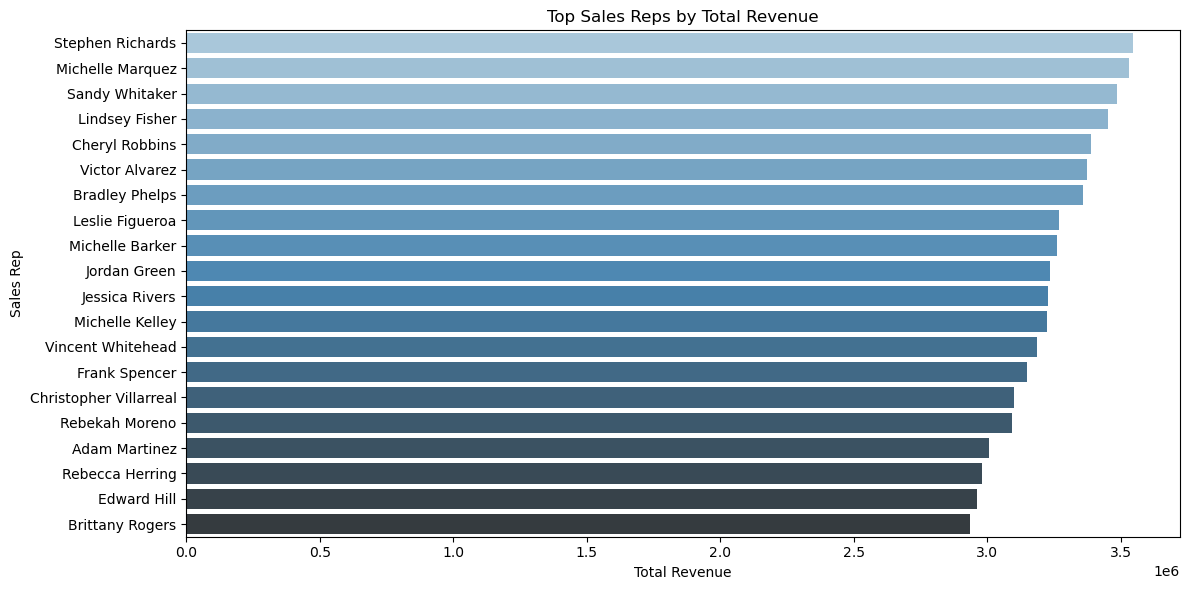

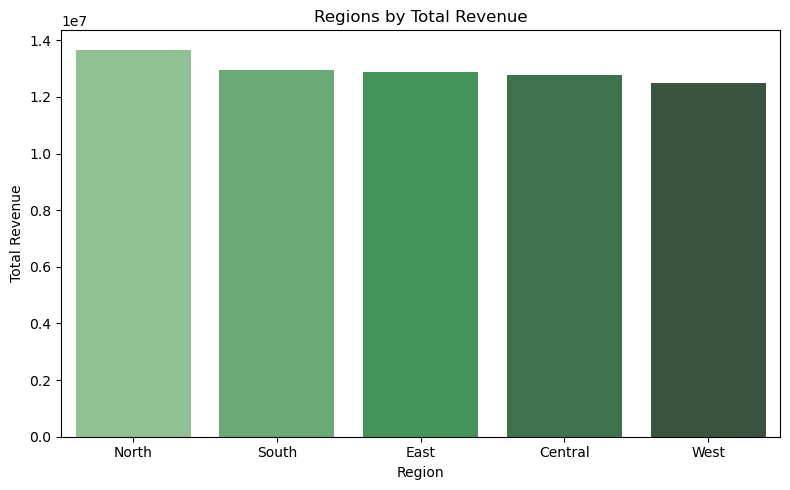

(                       Rep       Total
 0         Stephen Richards  3544893.86
 1         Michelle Marquez  3529541.19
 2           Sandy Whitaker  3484394.05
 3           Lindsey Fisher  3451248.73
 4           Cheryl Robbins  3387493.35
 5           Victor Alvarez  3374306.56
 6           Bradley Phelps  3357299.99
 7          Leslie Figueroa  3270137.26
 8          Michelle Barker  3259748.46
 9             Jordan Green  3233663.98
 10          Jessica Rivers  3226022.73
 11         Michelle Kelley  3224074.64
 12       Vincent Whitehead  3184720.63
 13           Frank Spencer  3150256.22
 14  Christopher Villarreal  3101974.26
 15          Rebekah Moreno  3093463.37
 16           Adam Martinez  3008009.76
 17         Rebecca Herring  2980204.43
 18             Edward Hill  2960067.28
 19         Brittany Rogers  2936260.90,
     Region        Total
 0    North  13667437.42
 1    South  12952957.17
 2     East  12882106.63
 3  Central  12771314.41
 4     West  12483966.02)

In [101]:
# Group by Rep and Region, summarize total revenue
rep_performance = data.groupby('Rep')['Total'].sum().sort_values(ascending=False).reset_index()
region_performance = data.groupby('Region')['Total'].sum().sort_values(ascending=False).reset_index()

# Plot top reps by total revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=rep_performance, x='Total', y='Rep', palette='Blues_d')
plt.title('Top Sales Reps by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Sales Rep')
plt.tight_layout()
plt.show()

# Plot regions by total revenue
plt.figure(figsize=(8, 5))
sns.barplot(data=region_performance, x='Region', y='Total', palette='Greens_d')
plt.title('Regions by Total Revenue')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

# Display the ranking tables
rep_performance, region_performance


---Insights:
Stephen Richards and the North Region are the most profitable performers.

Revenue is fairly balanced across regions, indicating nationwide performance strength.

# Any underperforming areas? – Look for regions or reps consistently below average inrevenue or profit.

In [104]:
# Calculate average revenue per rep and region
rep_avg_revenue = rep_performance['Total'].mean()
region_avg_revenue = region_performance['Total'].mean()

# Identify reps below average
underperforming_reps = rep_performance[rep_performance['Total'] < rep_avg_revenue]

# Identify regions below average
underperforming_regions = region_performance[region_performance['Total'] < region_avg_revenue]

underperforming_reps, underperforming_regions


(                       Rep       Total
 9             Jordan Green  3233663.98
 10          Jessica Rivers  3226022.73
 11         Michelle Kelley  3224074.64
 12       Vincent Whitehead  3184720.63
 13           Frank Spencer  3150256.22
 14  Christopher Villarreal  3101974.26
 15          Rebekah Moreno  3093463.37
 16           Adam Martinez  3008009.76
 17         Rebecca Herring  2980204.43
 18             Edward Hill  2960067.28
 19         Brittany Rogers  2936260.90,
     Region        Total
 2     East  12882106.63
 3  Central  12771314.41
 4     West  12483966.02)

----Insights:
West Region shows the lowest performance overall 

Several reps are clustered just below the average, suggesting potential for improvement.

None of these areas are drastically failing, but they are consistently below the company-wide average.

# Recommendations to improve sales – Use patterns from the analysis to suggest actionable steps.
---Capitalize on High-Performing Periods
Focus Campaigns in May and Q4 (Nov-Dec)
These months consistently show revenue and profit peaks.

Action: Launch targeted marketing or promotions during these months.

Action: Ensure inventory and staffing are optimized to handle demand spikes

---Support Underperforming Reps
Coaching for Reps Below $3.2M in Revenue
Target support for reps like Brittany Rogers, Edward Hill, and Adam Martinez.

Action: Provide sales training, coaching, or territory reassessment.

Action: Pair them with top performers for mentorship

---Regional Focus on West and Central
Boost Performance in West and Central Regions
These regions trail behind North and South.

Action: Run region-specific promotions or partnerships.

Action: Investigate if these areas face logistical, pricing, or competitive challenges.

---Promote High-Profit Products
Focus on High-Margin Products Like Headsets and Tablets
These products generate the highest total revenue.

Action: Prioritize these in marketing and sales pitches.

Action: Bundle them with lower-performing items to boost overall sales

---Expand Data-Driven Coaching and Target Setting
Use Monthly and Quarterly Dashboards to:

Track rep and region performance in real-time.

Trigger alerts when performance falls below target.

Inform managers where to allocate resources effectively.